In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [48]:
k = 1.380649e-23 #costante di boltzmann
h = 6.62607015e-34 #costante di plank
b = 2.898*10**-3 #costante di Wien
c = 299792458 #velocità luce nel vuoto

# La legge di Wien e alcune applicazioni

La legge dello spostamento di Wien è:
$$
\lambda_{max}T=b; \quad b\,\text{è una costante misurata empiricamente, detta costante di Wien}\\
b=2,898\cdot 10^{-3}\, m\cdot K
$$


## ex 1 
Determinare la frequenza di emissione del corpo umano che si trova alla temperatura di $36,5\,°C$.
**soluzione**
$$
\lambda_{max}T=b; \quad b \Rightarrow \lambda_{max}=\frac{b}{T}
$$
**Attenzione che la temperatura va inserita in kelvin! Quindi $T(K)=T(°C)+273,15$**
Per ottenbere la frequenza ora basta ricordare che
$$
c=\lambda*f\Rightarrow f = \frac{c}{\lambda}
$$
Dove $c$ è la velocità della luce nel vuoto.

In [49]:
# dati e svolgimeno ex.1

T_C = 36.5
T_K = T_C+273.15
lambda_max = b/T_K
f_max = c/lambda_max

print("la lunghezza d'onda del picco di emissione è", f"{lambda_max:.3E}","m" )
print("la frequenza del picco di emissione è", f"{f_max:.3E}","Hz" )

la lunghezza d'onda del picco di emissione è 9.359E-06 m
la frequenza del picco di emissione è 3.203E+13 Hz


/home/mb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


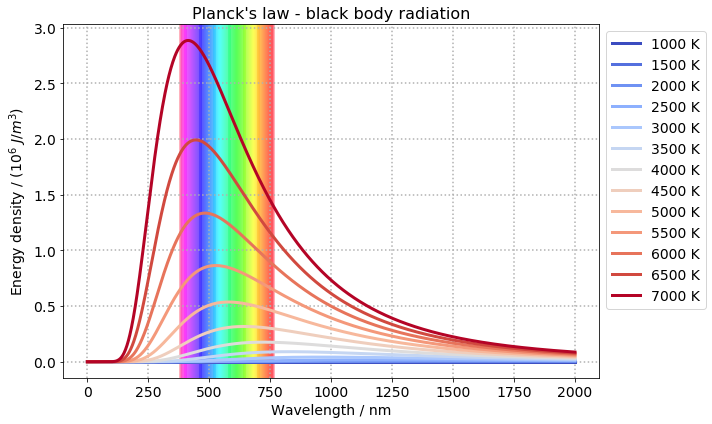

In [45]:

from scipy.constants import h, c, k, pi


def planck_energy_density(wavelength, temperature):
    """Spectral energy density according to Planck's law.
    Uses the SI unit system, so the wavelength must be in meters (m) and the
    temperature must be in Kelvin (K). Returns the spectral energy density form
    of the Planck's law in Joule per cubic meter per spectral unit.
    Parameters
    ----------
    wavelength : float or array
        The wavelength(s) in meter. Accepts vectors or floats
    temperature : float
        Temperature in Kelvin.
    Returns
    -------
    array or float
        Spectral energy density vector or float (depends on wavelength)
    """
    rho = (8 * pi * h * c) / (wavelength**5 * (np.exp((h * c) /
                                                      (wavelength * k *
                                                       temperature)) - 1))
    return rho


def plot_visible(lines=100, transparency=0.3, linewidth=3, unit_exponent=1e9):
    """Plots a visible spectrum in the current axis. Must be called before the
    desired plot.
    Parameters
    ----------
    lines : int, optional
        The number of lines. Increase if blank spaces are noted, by default 100
    transparency : float, optional
        The transparency of the lines, by default 0.3
    linewidth : int, optional
        The width of lines, by default 3. Be careful not to use a large number
    unit_exponent : float, optional
        Usually the plots are in nanometers so by default 1e9.
    """
    ax = plt.gca()
    steps = lines
    visible = np.linspace(380e-9, 760e-9, steps)
    colormap = plt.cm.gist_rainbow
    colors = [colormap(i) for i in np.linspace(0.0, 1.0, steps)]
    j = 0
    for val in visible:
        ax.axvline(val * unit_exponent, lw=linewidth,
                   color=colors[-j], alpha=transparency, zorder=-1)
        j += 1


def plot_planck(wavelength_array,
                temperature_array,
                colors=plt.cm.coolwarm,
                tick_fontsize=14,
                axes_fontsize=14,
                title_fontsize=16):
    """Plots the Planck's law. The plot is in SI units (wavelength will appear
    in nanometer).
    Parameters
    ----------
    wavelength_array : array
        Wavelength array in meters
    temperature_array : array
        Temperature in Kelvin. If only one, pass as a list with the value,
        e.g. [5000]
    colors : [type], optional
        Desired colormap, by default plt.cm.coolwarm
    tick_fontsize : int, optional
        Tick labels font size, by default 14
    axes_fontsize : int, optional
        Axes labels font size, by default 14
    title_fontsize : int, optional
        Title font size, by default 16
    """

    results = []
    for temperature in temperature_array:
        results.append(planck_energy_density(wavelength_array, temperature))

    # gets the current axes and set a colormap
    ax = plt.gca()

    colormap = colors
    ax.set_prop_cycle(plt.cycler('color', colormap(
        np.linspace(0, 1, len(temperature_array)))))

    # grid lines
    ax.grid(linestyle=':', linewidth=1.5)

    # the plots and legend
    for result, temperature in zip(results, temperature_array):
        ax.plot(wavelength_array * 1e9, result,
                label='{} K'.format(temperature), linewidth=3)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

    # setting the y-axis to scientific notation and
    # getting the order of magnitude
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.yaxis.major.formatter._useMathText = True
    ax.figure.canvas.draw()  # Update the text
    order_magnitude = ax.yaxis.get_offset_text().get_text().replace('\\times',
                                                                    '')
    ax.yaxis.offsetText.set_visible(False)

    # labels and title
    ax.set_xlabel('Wavelength / nm', fontsize=axes_fontsize)
    ax.set_ylabel('Energy density / (' + order_magnitude +
                  ' $J/m^3$)', fontsize=axes_fontsize)
    ax.tick_params(labelsize=tick_fontsize)
    ax.set_title('Planck\'s law - black body radiation',
                 fontsize=title_fontsize)

    plt.tight_layout()
    plt.show()


def plot_planck_interactive(wavelength_array,
                            temperature=0):
    """Interactive plot.
    Parameters
    ----------
    wavelength_array : array
        Wavelength array in meters
    temperature : int, optional
        Initial temperature in the plot, by default 0
    """

    plt.figure(figsize=(10, 6))
    plot_visible()
    results = planck_energy_density(wavelength_array, temperature)

    # gets the current axes and set a colormap
    ax = plt.gca()

    # grid lines
    ax.grid(linestyle=':', linewidth=1.5)

    # the plots and legend
    ax.plot(wavelength_array * 1e9, results,
            label='{} K'.format(temperature), linewidth=3)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

    # setting the y-axis to scientific notation and
    # getting the order of magnitude
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.yaxis.major.formatter._useMathText = True
    ax.figure.canvas.draw()  # Update the text
    order_magnitude = ax.yaxis.get_offset_text().get_text().replace('\\times',
                                                                    '')
    ax.yaxis.offsetText.set_visible(False)

    # labels and title
    ax.set_xlabel('Wavelength / nm', fontsize=14)
    ax.set_ylabel('Energy density / (' + order_magnitude +
                  ' $J/m^3$)', fontsize=14)
    ax.tick_params(labelsize=14)
    ax.set_title('Planck\'s law - black body radiation',
                 fontsize=16)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    lambda_array = np.linspace(1.0e-9, 2.0e-6, 1000)
    temperature_array = np.arange(1000, 7001, 500)
    fig1 = plt.figure(figsize=(10, 6))
    ax = fig1.add_subplot(111)
    plot_visible()
    plot_planck(lambda_array, temperature_array)